# Collisions

## The theory behind collision of two balls

### Collision event

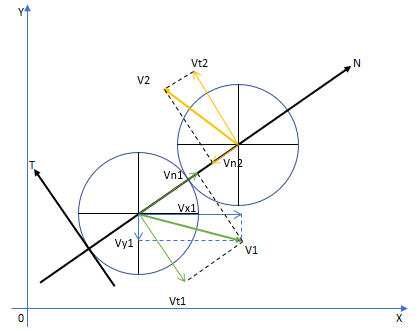
Fig.1 Velocity vectors when two balls collide.

- Collision is happening in XY coord-system corresponding to the actual screen system.
- Velocity vectors V1 and V2 can be decomposed into respective Vx and Vy
- The line connecting 2 ball centers is creating new coordinate system where actual vector change happens- NT coord-system
- We will have to transition from XY into NT system to be able to calculate colission effect.
- V vectors are mapped into NT system resulting in Vn and Vt vectors
- When collision happens in NT system, Vt vectors remain the same.
- Balls are exchanging with their Vn vectors keeping same directions. I.e. Vn1 application point goes to Ball 2 center point keeping the same direction and Vn2 application point goes to ball 1 center point keeping it's direction as well. See Fig.2.

### After collision

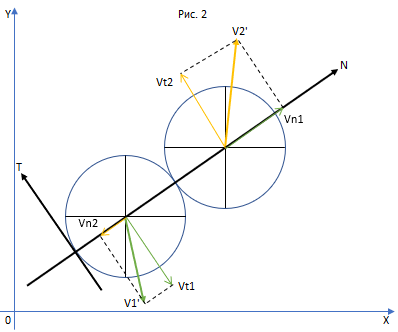
Fig.2. Velocity vectors in NT system after collision.

- Now, when velocity vectors are exchanged, we just need to transition from NT system back to XY system.
- Both to-NT and to-XY transitions are made using rotation of axes method.

### Rotation of axes

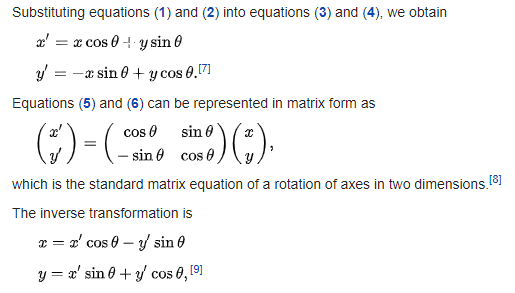
Fig. 3. Rotation of axes.

- See https://en.wikipedia.org/wiki/Rotation_of_axes and Fig 3. for method description
- After reverse transition we will have our new velocity vectors for both balls - V1' and V2'.

## The algorithm

- Calculate difference between center points: dx, dy and d = sqrt(dx^2 + dy^2)
- Calculate cos of the angle formed by d and dx, and sin of the same angle usind d and dy
- Rotate Vx and Vy vectors for both balls using rotation of axes formula. Thanks to arcade we have x and y components of velocity in sprite.change_x and sprite.change_y
- Exchange Vn vectors
- Rotate axes back

## The code

In [1]:
import numpy as np

# Definitions
# Ball 1
# Center coordinates
x1 = 133
y1 = 115
# Velocity components
vx1 = 128
vy1 = -32

# Ball 2
# Center coordinates
x2 = 251
y2 = 195
# Velocity components
vx2 = -96
vy2 = 65

In [2]:
# Difference between centers
dx = x2 - x1                                   # x difference
dy = y2 - y1                                   # y difference
d = np.sqrt(np.square(dx) + np.square(dy))     # distance - credit goes to Pythagoras

In [3]:
# cos and sin of the rotation angle
cos_fi = dx / d
sin_fi = dy / d

In [4]:
# Rotate axes and get vn1 and vt1
vn1 = vx1 * cos_fi + vy1 * sin_fi
vt1 = - vx1 * sin_fi + vy1 * cos_fi
# Rotate axes and get vn2 and vt2
vn2 = vx2 * cos_fi + vy2 * sin_fi
vt2 = - vx2 * sin_fi + vy2 * cos_fi

In [5]:
# Exchange vn1 and vn2
vn1 = vn1 + vn2
vn2 = vn1 - vn2
vn1 = vn1 - vn2

In [6]:
# Rotate axes back and get new vx1 and vy1
v1x = vn1 * cos_fi - vt1 * sin_fi
v1y = vn1 * sin_fi + vt1 * cos_fi
# Rotate axes back and get new vx2 and vy2
v2x = vn2 * cos_fi - vt2 * sin_fi
v2y = vn2 * sin_fi + vt2 * cos_fi

In [7]:
print (v1x, v1y)
print (v2x, v2y)

19.591419012005524 -105.49734304270814
12.408580987994476 138.49734304270817


## Code compression

The code above is not optimized and uses number of variables for better visibility. The actual code in player.py is shorter and less obvious:

In [0]:
vn1 = self.sprite.speed[0] * dx / d + self.sprite.speed[1] * dy / d
vt1 = -self.sprite.speed[0] * dy / d + self.sprite.speed[1] * dx / d
vn2 = other_player.sprite.speed[0] * dx / d + other_player.sprite.speed[1] * dy / d
vt2 = -other_player.sprite.speed[0] * dy / d  + other_player.sprite.speed[1] * dx / d

self.sprite.speed[0] = vn2 * dx / d - vt1 * dy / d
self.sprite.speed[1] = vn2 * dy / d + vt1 * dx / d
other_player.sprite.speed[0] = vn1 * dx / d - vt2 * dy / d
other_player.sprite.speed[1] = vn1 * dy / d + vt2 * dx / d